In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some data
from DataGeneration import GenerateData

ModuleNotFoundError: No module named 'numba'

In [3]:
tmp = GenerateData()
tmp.generate(10000)
tmp.export()

Generating 10000 intensity functions...
Data generation finished in 172.88 s.


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
import os

directory = os.getcwd()

X = np.load(directory + "/PodatkiK/intenziteta700noise0.npy")
Y = np.load(directory + "/PodatkiK/C_values.npy") / (300 * 1e-10)

In [4]:
X.shape, Y.shape

((10000, 400), (10000,))

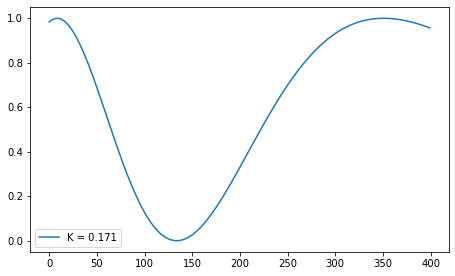

In [6]:
idx = 11
plt.figure(figsize=(7.5, 4.5))
plt.plot(X[idx, :], label='K = %0.3g' %Y[idx])
plt.legend()
plt.show()

In [7]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

[]


In [10]:
model = Sequential() # naredimo model/ NN
# prva skrita plast: 400 nevronov, 400 izhodnih nevronov, normalna porazdelitev uteži
model.add(Dense(units=400, 
                activation='sigmoid', 
                input_shape=(400,), 
                kernel_initializer=initializers.RandomNormal(stddev=0.01)))

#dodamo še ostale skripte plasti
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))

#Zadnja plast je izhodna . ker iščemo skalar, vsebuje samo en nevron
model.add(Dense(1, activation='sigmoid'))

#zgradimo nevronsko mrežo
# pri tem določimo vrsto otimizatorja, funkcijo izgube ter potencialne ostale mere uspešnosti
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

# za trening nevronski mreži podamo vhodne in izhodne podatke
# določilo število epoh in velikost batchev
# za razdelitev na učni in validacijski set lahko uporabimo validation_split
#lahko tudi sami specificiramo validacijski set z validation_data
# shuffle: če zmeša trening podatke pred opoho
history = model.fit(X, Y, epochs=100, batch_size=300, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/100
27/27 - 0s - loss: 0.2632 - mean_squared_error: 0.0971 - val_loss: 0.2518 - val_mean_squared_error: 0.0861
Epoch 2/100
27/27 - 0s - loss: 0.2498 - mean_squared_error: 0.0842 - val_loss: 0.2473 - val_mean_squared_error: 0.0818
Epoch 3/100
27/27 - 0s - loss: 0.2470 - mean_squared_error: 0.0819 - val_loss: 0.2432 - val_mean_squared_error: 0.0792
Epoch 4/100
27/27 - 0s - loss: 0.2350 - mean_squared_error: 0.0750 - val_loss: 0.2205 - val_mean_squared_error: 0.0668
Epoch 5/100
27/27 - 0s - loss: 0.2136 - mean_squared_error: 0.0639 - val_loss: 0.2032 - val_mean_squared_error: 0.0585
Epoch 6/100
27/27 - 0s - loss: 0.1994 - mean_squared_error: 0.0572 - val_loss: 0.1889 - val_mean_squared_error: 0.0525
Epoch 7/100
27/27 - 0s - loss: 0.1870 - mean_squared_error: 0.0522 - val_loss: 0.1777 - val_mean_squared_error: 0.0479
Epoch 8/100
27/27 - 0s - loss: 0.1777 - mean_squared_error: 0.0484 - val_loss: 0.1717 - val_mean_squared_error: 0.0451
Epoch 9/100
27/27 - 0s - loss: 0.1712 - mean_squ

In [11]:
#history.history.keys()
# Compute moving average
def moving_average(a, n=3) :
    idx = np.cumsum(np.arange(len(a)),dtype=float)
    idx[n:] = idx[n:] - idx[:-n]
    res = np.cumsum(a, dtype=float)
    res[n:] = res[n:] - res[:-n]
    return idx[n - 1:] / n, res[n - 1:] / n


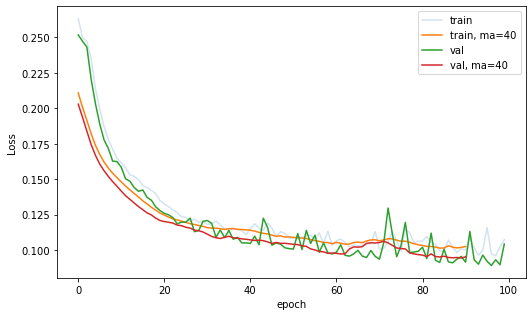

In [13]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(history.history['loss'], label='train',alpha=0.2)
plt.plot(moving_average(history.history['loss'], 10)[1], label='train, ma=40')
plt.plot(history.history['val_loss'], label='val')
plt.plot(moving_average(history.history['val_loss'], 10)[1], label='val, ma=40')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
#plt.yscale('log')
plt.show()

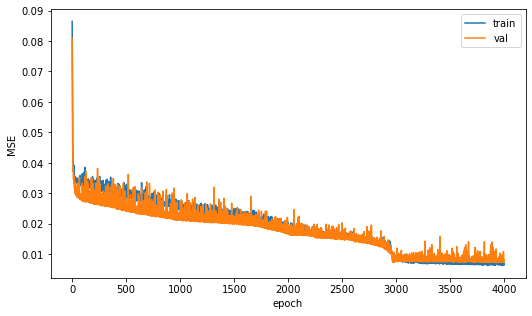

In [12]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='val')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
#plt.yscale('log')
plt.show()

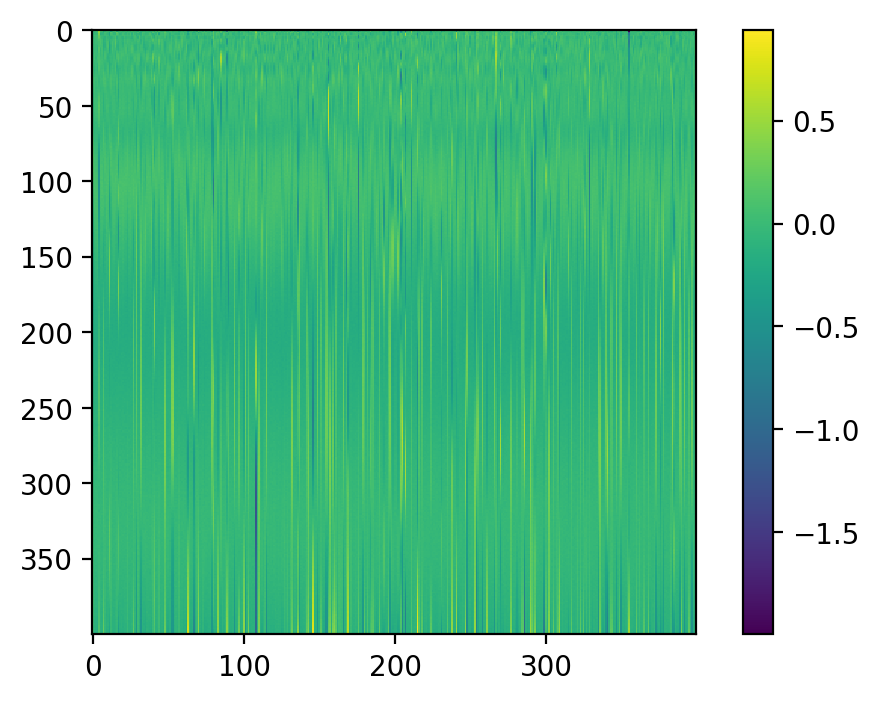

In [13]:
weights, biases = model.layers[0].get_weights()
fig = plt.figure(dpi=200)
img = plt.imshow(weights)
fig.colorbar(img)
plt.show()

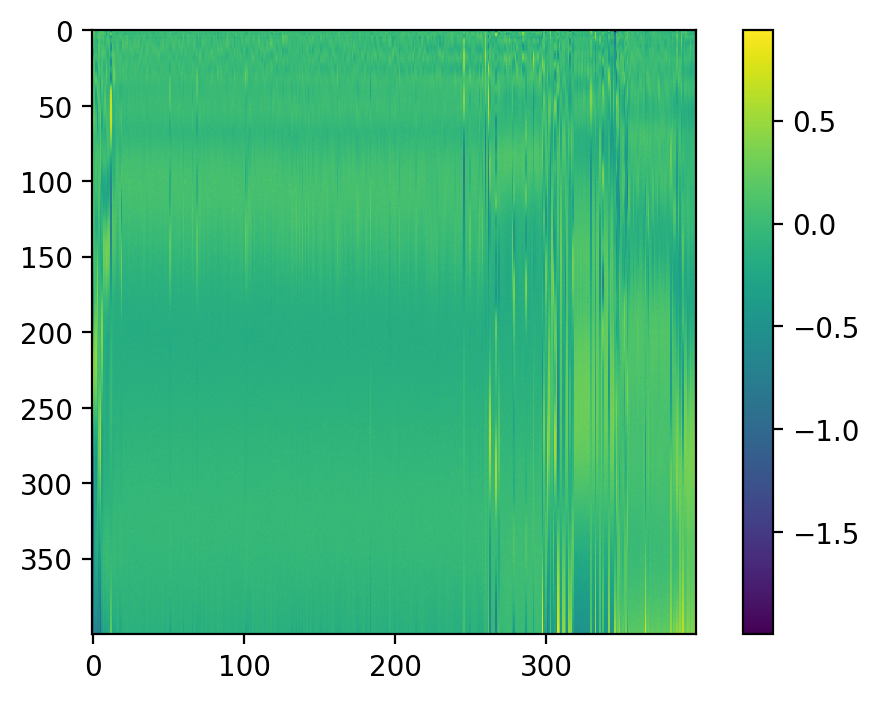

In [14]:
mean_val = np.max(weights, 0) # vzamemo povprecno vrednost vsakega stolpca
indices = np.argsort(np.dot(weights.T, np.arange(400))) # sortiramo utezi
fig = plt.figure(dpi=200)
img = plt.imshow(weights.T[indices].T)
fig.colorbar(img)
plt.show()

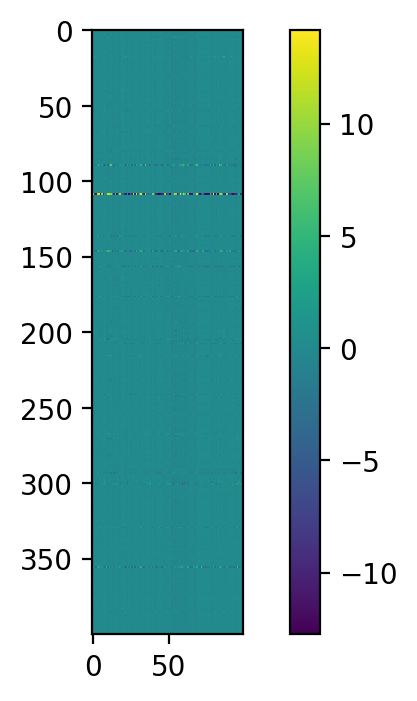

In [15]:
weights, biases = model.layers[1].get_weights()
#indices = np.argsort(np.dot(weights.T, np.arange(400))) # sortiramo utezi
fig = plt.figure(dpi=200)
img = plt.imshow(weights)
fig.colorbar(img)
plt.show()

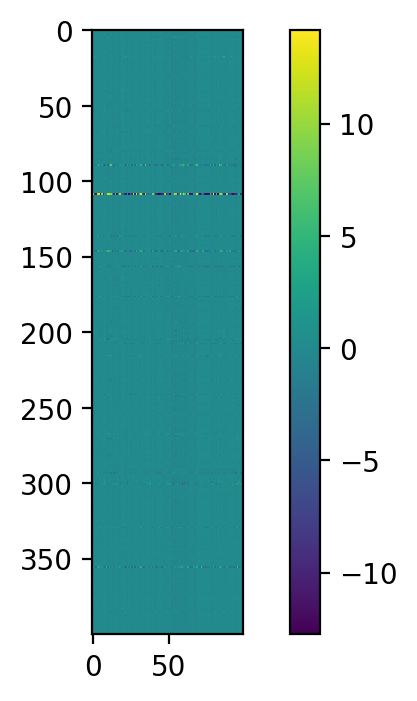

In [16]:
weights, biases = model.layers[1].get_weights()
#indices = np.argsort(np.dot(weights.T, np.arange(400))) # sortiramo utezi
fig = plt.figure(dpi=200)
img = plt.imshow(weights)
fig.colorbar(img)
plt.show()

In [15]:
model2 = Sequential() # naredimo model/ NN
# prva skrita plast: 400 nevronov, 400 izhodnih nevronov, normalna porazdelitev uteži
model2.add(Dense(units=400, 
                activation='sigmoid', 
                input_shape=(400,), 
                kernel_initializer=initializers.RandomNormal(stddev=0.01)))

#dodamo še ostale skripte plasti
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(50, activation='sigmoid'))
#Zadnja plast je izhodna . ker iščemo skalar, vsebuje samo en nevron
model2.add(Dense(1, activation='sigmoid'))

#zgradimo nevronsko mrežo
# pri tem določimo vrsto otimizatorja, funkcijo izgube ter potencialne ostale mere uspešnosti
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

# za trening nevronski mreži podamo vhodne in izhodne podatke
# določilo število epoh in velikost batchev
# za razdelitev na učni in validacijski set lahko uporabimo validation_split
#lahko tudi sami specificiramo validacijski set z validation_data
# shuffle: če zmeša trening podatke pred opoho
history2 = model2.fit(X, Y, epochs=100, batch_size=300, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/100
30/30 - 0s - loss: 0.2117 - mean_squared_error: 0.0640 - val_loss: 0.1818 - val_mean_squared_error: 0.0511
Epoch 2/100
30/30 - 0s - loss: 0.1766 - mean_squared_error: 0.0518 - val_loss: 0.1738 - val_mean_squared_error: 0.0514
Epoch 3/100
30/30 - 0s - loss: 0.1701 - mean_squared_error: 0.0508 - val_loss: 0.1640 - val_mean_squared_error: 0.0470
Epoch 4/100
30/30 - 0s - loss: 0.1643 - mean_squared_error: 0.0496 - val_loss: 0.1611 - val_mean_squared_error: 0.0469
Epoch 5/100
30/30 - 0s - loss: 0.1602 - mean_squared_error: 0.0489 - val_loss: 0.1561 - val_mean_squared_error: 0.0454
Epoch 6/100
30/30 - 0s - loss: 0.1576 - mean_squared_error: 0.0486 - val_loss: 0.1533 - val_mean_squared_error: 0.0458
Epoch 7/100
30/30 - 0s - loss: 0.1500 - mean_squared_error: 0.0465 - val_loss: 0.1440 - val_mean_squared_error: 0.0432
Epoch 8/100
30/30 - 0s - loss: 0.1444 - mean_squared_error: 0.0454 - val_loss: 0.1401 - val_mean_squared_error: 0.0418
Epoch 9/100
30/30 - 0s - loss: 0.1416 - mean_squ

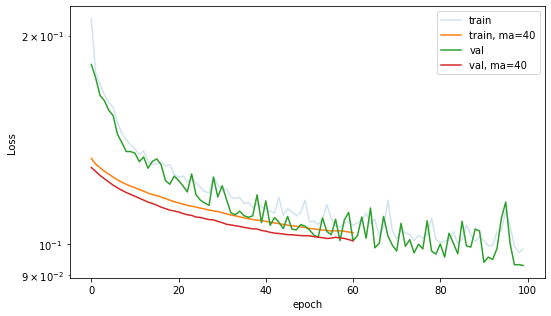

In [16]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(history2.history['loss'], label='train',alpha=0.2)
plt.plot(moving_average(history2.history['loss'], 40)[1], label='train, ma=40')
plt.plot(history2.history['val_loss'], label='val')
plt.plot(moving_average(history2.history['val_loss'], 40)[1], label='val, ma=40')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
plt.yscale('log')
plt.show()

In [36]:
obj = GenerateData()
obj.generate(1000)
#obj.export(path_to_save_folder="PodatkiK_1_test")

In [35]:
X_test = obj.all_intensities[0]
Y_test = obj.all_cs

In [17]:
# Sample for test is located in test_sample folder
X_test = np.load(directory + "/PodatkiK_1/test_sample/intenziteta700noise0.npy")
Y_test = np.load(directory + "/PodatkiK_1/test_sample/C_values.npy") / (1e-10)

In [18]:
#X_predict2 = model2.predict(X_test) * 300
X_predict = model.predict(X_test) * 300

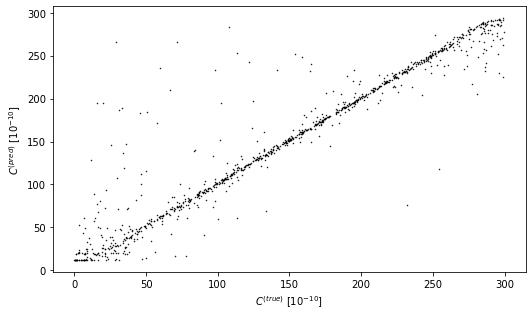

In [19]:
plt.figure(figsize=(7.5, 4.5))
#plt.plot(Y_test * 1e10, X_predict2, 'r.', markersize=1)
plt.plot(Y_test, X_predict, 'k.', markersize=1)
#plt.xlim(0, 300)
#plt.ylim(0, 300)
plt.xlabel('$C^{(true)}$ $[10^{-10}]$')
plt.ylabel('$C^{(pred)}$ $[10^{-10}]$')
plt.tight_layout()
plt.show()

In [20]:
# Evaluate the model on the test data using `evaluate`
print("Model: Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=300)
print("test loss, test acc:", results)
rel_diff = (X_predict-Y_test.reshape(-1,1)) / Y_test.reshape(-1,1)

Model: Evaluate on test data
4/4 [==============================] - 0s 2ms/step - loss: 146.1552 - mean_squared_error: 28971.9258
test loss, test acc: [146.1551971435547, 28971.92578125]


In [ ]:
print("Model 2: Evaluate on test data")
results2 = model2.evaluate(X_test, Y_test, batch_size=300)
print("test loss, test acc:", results2)

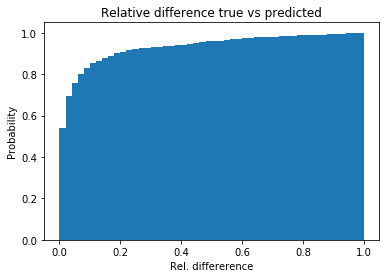

In [21]:
plt.hist(np.abs(rel_diff), bins=50, range=(0,1), density=True, cumulative=True)
plt.title("Relative difference true vs predicted")
plt.xlabel("Rel. differerence")
plt.ylabel("Probability")
plt.show()

In [17]:
def create_model(activation='sigmoid', optimizer='adam'):
    model = Sequential()
    model.add(Dense(400, activation=activation, input_shape=(400,)))
    model.add(Dense(200, activation=activation))
    model.add(Dense(100, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(1, activation=activation))
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mse'])
    return model

In [18]:
# KFOLD
from sklearn.model_selection import KFold

n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True)
fold_n = 1
score_per_fold = []


In [20]:
for train, test in kf.split(X[:1000], Y[:1000]):
    #print(train.shape, test.shape)
    modelCV = create_model()
    history = modelCV.fit(X[train], Y[train], epochs=100, batch_size=100, verbose=0)
    
    scores = modelCV.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_n}: {modelCV.metrics_names} of {scores}')
    score_per_fold.append(scores)
    
    fold_n += 1

Score for fold 1: ['loss', 'mse'] of [0.13938574492931366, 0.039462681859731674]
Score for fold 2: ['loss', 'mse'] of [0.12325747311115265, 0.034250978380441666]
Score for fold 3: ['loss', 'mse'] of [0.12686961889266968, 0.03929092362523079]
